# CENG 215 — Circuits and Electronics
## Lecture 1 Companion Notebook: Voltage Divider & RC Demo

**Instructor:** Prof. Dr. Tolga Ayav  
**Updated:** 2025-09-27

### What you'll do in this notebook
- Compute and visualize a basic **voltage divider**.
- Simulate the **RC charging** response and interpret \(\tau = RC\).
- (Optional) Run **PySpice** demos for the same circuits (after installing PySpice + Ngspice).
- Review a **First-Lab Prep Checklist** and **installation guide** at the end.


## 1) Voltage Divider — Theory

A classic two-resistor divider with supply \(V_S\), resistors \(R_1\) and \(R_2\), and output taken across \(R_2\):

\[
V_\text{out} = V_S \cdot \frac{R_2}{R_1 + R_2}
\]

**Tips**
- Use KCL/KVL to verify the formula.
- Check limits: \(R_2 \to 0 \Rightarrow V_\text{out} \to 0\); \(R_2 \to \infty \Rightarrow V_\text{out} \to V_S\).


In [16]:
# --- Voltage Divider (Basic Calculation) ---
# Edit these values and re-run the cell

Vs = 12.0          # volts
R1 = 3_000.0       # ohms
R2 = 6_000.0       # ohms

Vout = Vs * (R2 / (R1 + R2))
I = Vs / (R1 + R2)
P1 = I**2 * R1
P2 = I**2 * R2

print(f"Vout = {Vout:.3f} V")
print(f"Loop current I = {I*1e3:.3f} mA")
print(f"P1 = {P1*1e3:.3f} mW, P2 = {P2*1e3:.3f} mW, Psource = {(P1+P2)*1e3:.3f} mW")

Vout = 8.000 V
Loop current I = 1.333 mA
P1 = 5.333 mW, P2 = 10.667 mW, Psource = 16.000 mW


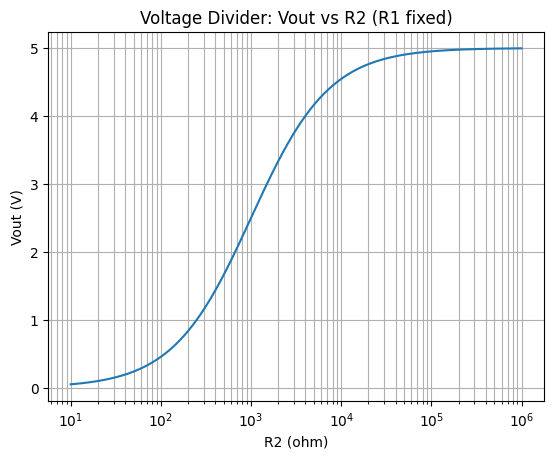

In [17]:
# --- Sweep R2 and plot Vout ---
import numpy as np
import matplotlib.pyplot as plt

Vs = 5.0
R1 = 1_000.0
R2_values = np.logspace(1, 6, 300)   # 10 ohm to 1 Mohm
Vout_values = Vs * (R2_values / (R1 + R2_values))

plt.figure()
plt.semilogx(R2_values, Vout_values)
plt.xlabel('R2 (ohm)')
plt.ylabel('Vout (V)')
plt.title('Voltage Divider: Vout vs R2 (R1 fixed)')
plt.grid(True, which='both')
plt.show()

In [18]:
# --- Optional: Interactive (requires ipywidgets) ---
# If ipywidgets is installed, this will show sliders. Otherwise it will print a message.

try:
    import ipywidgets as widgets
    import numpy as np
    import matplotlib.pyplot as plt
    from IPython.display import display, clear_output

    Vs_widget = widgets.FloatSlider(value=5.0, min=0.0, max=20.0, step=0.1, description='Vs (V)')
    R1_widget = widgets.FloatLogSlider(value=1_000.0, base=10, min=1, max=6, step=0.01, description='R1 (Ω)')
    R2_widget = widgets.FloatLogSlider(value=1_000.0, base=10, min=1, max=6, step=0.01, description='R2 (Ω)')

    out = widgets.Output()

    def update_plot(*args):
        with out:
            clear_output(wait=True)
            Vs = Vs_widget.value
            R1 = R1_widget.value
            R2 = R2_widget.value
            Vout = Vs * (R2 / (R1 + R2))
            I = Vs / (R1 + R2)

            print(f"Vout = {Vout:.3f} V, I = {I*1e3:.3f} mA")
            plt.figure()
            plt.bar(['Vout','Vs-Vout'], [Vout, Vs-Vout])
            plt.ylabel('Voltage (V)')
            plt.title('Divider Voltage Partition')
            plt.show()

    for w in (Vs_widget, R1_widget, R2_widget):
        w.observe(update_plot, 'value')
    update_plot()

    display(widgets.VBox([Vs_widget, R1_widget, R2_widget, out]))
except Exception as e:
    print("ipywidgets not available. To enable sliders: pip install ipywidgets && jupyter nbextension enable --py widgetsnbextension")

## 2) RC Charging — Analytic Demo

For a step from 0 to \(V_S\) at \(t=0\), the capacitor voltage is

\[
v_C(t) = V_S \, \left(1 - e^{-t/(RC)}\right) \quad \text{with} \quad \tau = RC.
\]

- At \(t = \tau\), \(v_C \approx 0.632 V_S\).
- The current \(i_C(t) = C \, dv_C/dt = (V_S/R) e^{-t/(RC)}\).


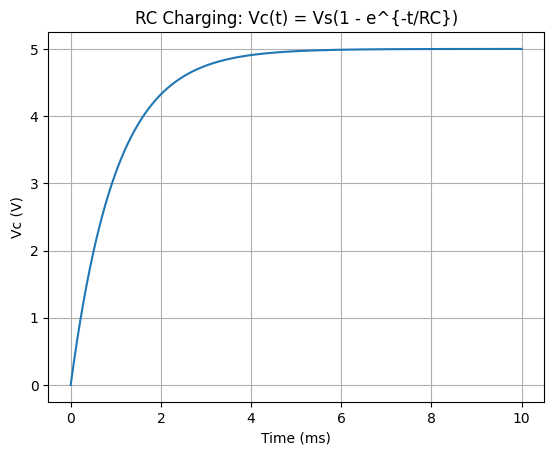

Tau (RC) = 1.000 ms, Vc(tau) ≈ 3.161 V


In [19]:
# --- RC Step Response (Analytic) ---
import numpy as np
import matplotlib.pyplot as plt

Vs = 5.0
R = 1e3          # ohm
C = 1e-6         # F
tau = R*C

t = np.linspace(0, 10*tau, 1000)
Vc = Vs*(1 - np.exp(-t/tau))

plt.figure()
plt.plot(t*1e3, Vc)
plt.xlabel('Time (ms)')
plt.ylabel('Vc (V)')
plt.title('RC Charging: Vc(t) = Vs(1 - e^{-t/RC})')
plt.grid(True)
plt.show()

print(f"Tau (RC) = {tau*1e3:.3f} ms, Vc(tau) ≈ {Vs*(1-np.exp(-1)):.3f} V")

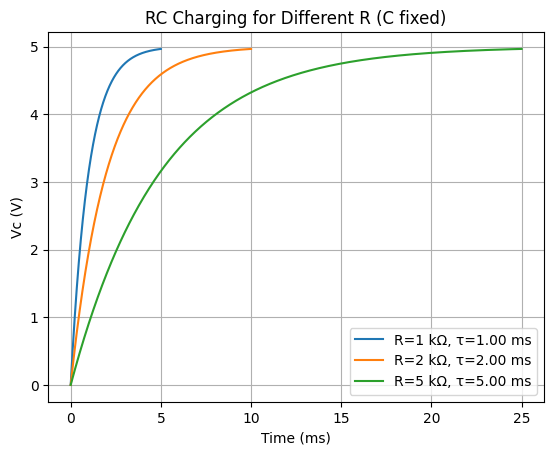

In [10]:
# --- Overlay multiple RC cases ---
import numpy as np
import matplotlib.pyplot as plt

Vs = 5.0
R_values = [1e3, 2e3, 5e3]
C = 1e-6

plt.figure()
for R in R_values:
    tau = R*C
    t = np.linspace(0, 5*tau, 800)
    Vc = Vs*(1 - np.exp(-t/tau))
    plt.plot(t*1e3, Vc, label=f'R={R/1e3:.0f} kΩ, τ={tau*1e3:.2f} ms')

plt.xlabel('Time (ms)')
plt.ylabel('Vc (V)')
plt.title('RC Charging for Different R (C fixed)')
plt.legend()
plt.grid(True)
plt.show()

## 3) PySpice Demos (require PySpice + Ngspice)

These cells will run *after* you install **Ngspice** and **PySpice** (see the Installation Guide below).  
If PySpice is not installed, the code will safely skip and print a message.


In [21]:
# --- PySpice: DC Operating Point for a Divider ---
try:
    import PySpice.Logging.Logging as Logging
    logger = Logging.setup_logging()
    from PySpice.Spice.Netlist import Circuit
    from PySpice.Unit import *

    circuit = Circuit('Divider DC')
    Vs = 5@u_V
    circuit.V('s', 'in', circuit.gnd, Vs)
    circuit.R(1, 'in', 'out', 1@u_kOhm)
    circuit.R(2, 'out', circuit.gnd, 2@u_kOhm)

    sim = circuit.simulator(temperature=25, nominal_temperature=25)
    op = sim.operating_point()

    for node in op.nodes.values():
        print(f"Node {str(node)} = {float(node):.4f} V")
except Exception as e:
    print("PySpice not available yet. Install Ngspice + PySpice (see guide below) and re-run.\n", e)

Node out = 3.3333 V
Node in = 5.0000 V


/var/folders/nc/69fd7bsx09ngn8hjfp3pxhgc0000gn/T/ipykernel_22121/3456490580.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Node {str(node)} = {float(node):.4f} V")


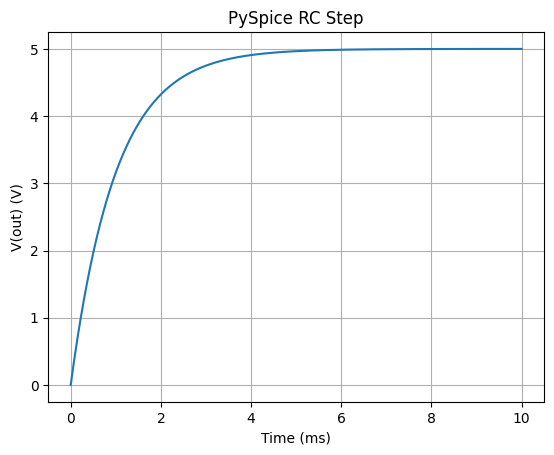

In [20]:
# --- PySpice: RC Transient ---
try:
    import PySpice.Logging.Logging as Logging
    logger = Logging.setup_logging()
    from PySpice.Spice.Netlist import Circuit
    from PySpice.Unit import *

    import matplotlib.pyplot as plt

    circuit = Circuit('RC Step')
    circuit.PulseVoltageSource('in', 'in', circuit.gnd, initial_value=0@u_V, pulsed_value=5@u_V,
                               rise_time=1@u_us, fall_time=1@u_us, pulse_width=10@u_ms, period=20@u_ms)
    circuit.R(1, 'in', 'out', 1@u_kOhm)
    circuit.C(1, 'out', circuit.gnd, 1@u_uF)

    sim = circuit.simulator()
    analysis = sim.transient(step_time=1@u_us, end_time=10@u_ms)

    plt.figure()
    plt.plot(analysis.time*1e3, analysis.out)
    plt.xlabel('Time (ms)')
    plt.ylabel('V(out) (V)')
    plt.title('PySpice RC Step')
    plt.grid(True)
    plt.show()
except Exception as e:
    print("PySpice not available yet. Install Ngspice + PySpice (see guide below) and re-run.\n", e)

## 4) Installation Guide — PySpice + Ngspice

### Why both?
- **Ngspice** is the SPICE simulator. PySpice is a Python interface that uses Ngspice’s **shared library**.
- You need Ngspice *installed* (with the shared lib) **before** installing/using PySpice.

---

### A) Windows 10/11 (x64)
1. **Install Ngspice** (shared library build):
   - Download the latest *shared* build from the Ngspice website (look for an installer containing `ngspice.dll`).
   - Install to the default path, e.g. `C:\Program Files\Spice64\` (or similar).
   - Ensure the folder containing `ngspice.dll` is on your **PATH** (e.g., `C:\Program Files\Spice64\bin` or `...\sharedspice\`).
   - Alternatively, set an environment variable `NGSPICE_SHARED` to the full path of the DLL (e.g., `C:\Program Files\Spice64\bin\ngspice.dll`).

2. **Install Python packages** (Anaconda or python.org recommended):
   ```powershell
   python -m pip install --upgrade pip
   pip install numpy matplotlib
   pip install PySpice
   ```

3. **Verify** inside Python:
   ```python
   import ctypes, os
   # If needed, set os.environ['NGSPICE_SHARED'] = r'C:\Program Files\Spice64\bin\\ngspice.dll'
   import PySpice
   print('PySpice version:', PySpice.__version__)
   ```

**Troubleshooting (Windows):**
- If PySpice can't find Ngspice, set `NGSPICE_SHARED` to the **DLL path** and restart the notebook.
- Ensure no old 32‑bit Ngspice remains on PATH.
- If build tools errors appear, try a recent Python (3.10–3.12) and updated pip.

---

### B) Ubuntu/Debian
1. **Install Ngspice**:
   ```bash
   sudo apt-get update
   sudo apt-get install -y ngspice
   ```
   This provides `libngspice.so` under `/usr/lib*`. No extra env usually required.

2. **Install Python packages**:
   ```bash
   python3 -m pip install --upgrade pip
   pip3 install numpy matplotlib PySpice
   ```

3. **Verify**:
   ```python
   import PySpice, ctypes
   print('PySpice:', PySpice.__version__)
   ```

**Troubleshooting (Ubuntu/Debian):**
- If the shared lib is not found, try: `sudo apt-get install -y libngspice0` (on some versions).
- Ensure `python3-dev` is installed if compilation is needed: `sudo apt-get install -y python3-dev`.

---

### C) Fedora/RHEL
```bash
sudo dnf install -y ngspice
python3 -m pip install --upgrade pip
pip3 install numpy matplotlib PySpice
```

If PySpice can’t find the library, locate `libngspice.so` (e.g., `/usr/lib64/`) and set:
```bash
export LD_LIBRARY_PATH=/usr/lib64:$LD_LIBRARY_PATH
```

---

### D) Arch/Manjaro
```bash
sudo pacman -Syu ngspice
python3 -m pip install --upgrade pip
pip3 install numpy matplotlib PySpice
```

---

### E) macOS (Intel & Apple Silicon)
1. **Install Homebrew** (if not installed): https://brew.sh
2. **Install Ngspice**:
   ```bash
   brew update
   brew install ngspice
   ```
   This installs `libngspice.dylib` under `/opt/homebrew/lib` (Apple Silicon) or `/usr/local/lib` (Intel).

3. **Install Python packages**:
   ```bash
   python3 -m pip install --upgrade pip
   pip3 install numpy matplotlib PySpice
   ```

4. **If PySpice cannot find Ngspice**, set the library path before launching Jupyter:
   - Apple Silicon (M1/M2/M3):
     ```bash
     export DYLD_LIBRARY_PATH=/opt/homebrew/lib:$DYLD_LIBRARY_PATH
     ```
   - Intel mac:
     ```bash
     export DYLD_LIBRARY_PATH=/usr/local/lib:$DYLD_LIBRARY_PATH
     ```

**Troubleshooting (macOS):**
- On newer macOS, `DYLD_LIBRARY_PATH` may be restricted for GUI apps. Start Jupyter from the same Terminal where you exported it.
- If using Conda, you can also `conda install -c conda-forge ngspice pyspice`.

---

### Quick Test (all platforms)
Run this after installation:
```python
import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

circuit = Circuit('Test')
circuit.V('s', 'in', circuit.gnd, 5@u_V)
circuit.R(1, 'in', 'out', 1@u_kOhm)
circuit.R(2, 'out', circuit.gnd, 1@u_kOhm)

sim = circuit.simulator(temperature=25, nominal_temperature=25)
op = sim.operating_point()
print('V(out) =', float(op.nodes['out']), 'V')
```

If this prints ≈ 2.5 V, you’re good to go.
